<a href="https://colab.research.google.com/github/cbcummings/book_fastai_pytorch/blob/main/01_intro_cbc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip show fastai

Name: fastai
Version: 1.0.61
Summary: fastai makes deep learning with PyTorch faster, more accurate, and easier
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: beautifulsoup4, packaging, bottleneck, scipy, matplotlib, fastprogress, pandas, torch, Pillow, requests, pyyaml, numpy, torchvision, nvidia-ml-py3, numexpr, spacy
Required-by: 


In [3]:
#hide_output
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 9.5MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [4]:
!pip show fastai

Name: fastai
Version: 2.4
Summary: fastai simplifies training fast and accurate neural nets using modern best practices
Home-page: https://github.com/fastai/fastai/tree/master/
Author: Jeremy Howard, Sylvain Gugger, and contributors
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: packaging, pandas, fastprogress, pyyaml, torch, spacy, pip, pillow, fastcore, scikit-learn, scipy, requests, torchvision, matplotlib
Required-by: 


In [5]:
from fastai.vision.all import *

In [6]:
path = untar_data(URLs.PETS)/'images'

In [21]:
def is_cat(x): return x[0].isupper()

In [22]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224)
)

In [23]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [24]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.171158,0.026960,0.008119,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.061190,0.011795,0.004060,00:49


In [25]:
infile = SimpleNamespace(data = ['swagger.jpg'])

In [26]:
img = PILImage.create(infile.data[0])

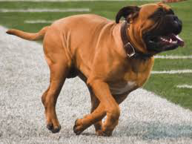

In [27]:
img.to_thumb(192)

In [28]:
is_cat,_,probs = learn.predict(img)
print(f"cat?: {is_cat}")
print(f"p cat: {probs[1].item():.6f}")

cat?: False
p cat: 0.000045
